In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [1]:
# k-NN 알고리즘 (k-Nearest Neighbors algorithm):

# k-NN 알고리즘은 지도학습 알고리즘으로, 분류(classification)와 회귀(regression) 문제에 사용됩니다.
# 알고리즘의 작동 방식은 다음과 같습니다:
# 주어진 데이터셋에서 새로운 데이터 포인트와 가장 가까운 k개의 이웃을 찾습니다.
# 이웃들의 레이블을 확인하여 분류 문제의 경우 가장 많은 레이블을 가진 클래스로 새로운 데이터를 분류합니다.
# 회귀 문제의 경우 k개 이웃의 평균 값을 예측값으로 사용합니다.
# k-NN 알고리즘은 주변 데이터의 패턴을 기반으로 예측하는 데 사용되며, 데이터의 분포를 고려합니다.
# 이 알고리즘은 단순하고 직관적이지만, 데이터셋이 매우 크면 계산 비용이 증가하는 단점이 있습니다.
# 또한, 이웃의 개수 k를 조정하여 알고리즘의 성능을 튜닝할 수 있습니다.

# 두 알고리즘을 비교하면, k-평균은 비지도학습으로 데이터를 클러스터로 그룹화하고, 
# k-NN은 지도학습으로 새로운 데이터를 분류하거나 예측합니다. 또한, k-평균은 클러스터링 문제에 적용되며,
# k-NN은 분류와 회귀 문제에 적용됩니다. 두 알고리즘은 각각의 목적과 데이터 형태에 따라 적합한 선택이 될 수 있습니다.

In [3]:
from sklearn.datasets import load_iris
iris= load_iris()

X = iris.data #x
y = iris.target #y
mask =y != 0 #0이 아닌걸 true 
X = X[mask]  #그리고 true인걸 x 에 넣음 (0을 다 제거)
y = y[mask]  

y = y - 1   # 1 과 2밖에 없는데 0 과 1로 만들려면 1뺴줌. 
X = X[:,[0,2]] #X 0번째 2번째 만 뽑아낼때 

In [4]:
from sklearn.linear_model import LogisticRegression #로지스틱회귀 
from sklearn.model_selection import train_test_split  # 훈련데이터와 테스트데이터 분해위한 sklearn의 model_selection 라이브러리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 , stratify = y)
lr = LogisticRegression(solver="liblinear", C=0.0001, random_state = 1 )
lr.fit(X_train,y_train)

LogisticRegression(C=0.0001, random_state=1, solver='liblinear')

In [8]:
prob = lr.predict_proba(X_test) #호출하여 테스트 데이터의 예측 확률을 계산 ,한 예측 확률을 반환

In [4]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
mask = y != 2 #2가 아닌것들만 True 로 

X= X[mask] #2 모두제거. 
y= y[mask] #2 빼고 0 1 만 남기기 


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [10]:
from sklearn.ensemble import BaggingClassifier #앙상블 2가지.  , BaggingClassifier -> 분류하는것 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 , stratify = y)#testsize-데이터비율 30퍼로
lr = LogisticRegression(solver="liblinear", C=1, random_state = 1 )
bag = BaggingClassifier(base_estimator= lr , n_estimators=500 , #Logistic regression 이 500개가 만들어짐 
                        n_jobs= 8) #cpu 코어 최대개수  (-1 로도 사용가능 ctrl+alt+del 로 성능확인가능. )
bag.fit(X_train,y_train)
p_test = bag.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# F1 스코어는 정밀도와 재현율의 조화 평균으로 계산되는 평가 지표 
#정밀도와 재현율이 모두 높은 경우에 상대적으로 높은 값을 가지며, 클래스의 불균형이 있는 경우에 유용함

print(f1_score(y_test, p_test)) # 테스트 데이터의 실제 값 y_test와 예측 값 p_test 간의 F1 스코어를 계산하고 출력

lr.fit(X_train,y_train)#호출하여 로지스틱 회귀 모델을 훈련 데이터에 맞춤

print(f1_score(y_test,lr.predict(X_test))) #호출하여 테스트 데이터의 실제 값 y_test와 로지스틱 회귀 모델의 예측 값 
                 #lr.predict(X_test) 간의 F1 스코어를 계산하고 출력. 이는 모델을 훈련한 후에 F1 스코어를 다시 계산하는 것.
                 #이를 통해 모델의 성능이 향상되었는지 확인할 수 있습

0.975609756097561
0.9523809523809523


In [12]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=lr , n_estimators= 500 ,
                        learning_rate= 0.1)
#base_estimator=lr은 약한 학습기로 로지스틱 회귀 모델 lr을 사용한다는 의미.
#n_estimators=500은 약한 학습기의 개수를 500개로 설정, learning_rate=0.1은 각 약한 학습기의 기여 정도를 조절하는 학습률을 설정

ada.fit(X_train, y_train)
p_test = ada.predict(X_test) #테스트 데이터 X_test에 대한 예측 값을 계산
f1_score(y_test,p_test)  #실제 값 y_test와 AdaBoost 분류기의 예측 값 p_test 간의 F1 스코어를 계산
                        # 이를통해 AdaBoost 분류기의 성능을 평가

0.9

In [13]:
X = iris.data
y = iris.target 

In [14]:
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [16]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = ("iris_tree.dot"), feature_names= iris.feature_names)

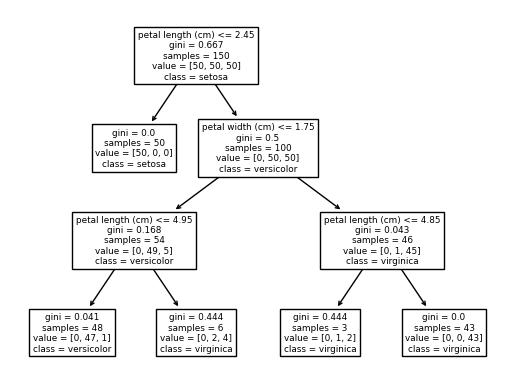

In [17]:
from sklearn.tree import plot_tree
plt.figure()
plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [ ]:
======================================================================================================
======================================================================================================
======================================================================================================
======================================================================================================

In [18]:
#○○
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier(max_depth=4) # 3에서 4로 바꿈
tree.fit(X[:,[0,2]],y) #X 를 4개 다안쓰고 2개만 으로 바꿔줌. 

DecisionTreeClassifier(max_depth=4)

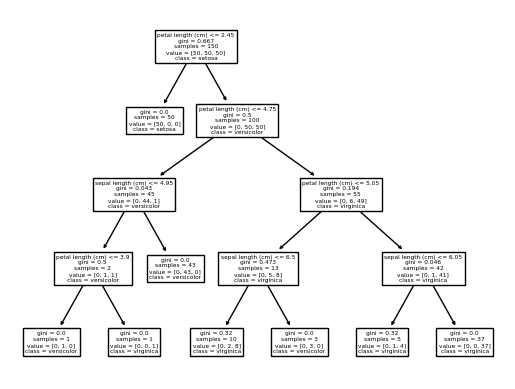

In [19]:
#○○
from sklearn.tree import plot_tree
plt.figure()
plot_tree(tree, feature_names=iris.feature_names[::2], class_names=iris.target_names) #features도 2개로 바꿔줌 
plt.show()

# l=["a",'b','c','d']
# l[::2] -> a 와 c  왜냐면 list[0,2 ] 이거는 안됨 ! 

In [20]:

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # ○○이게 2개라서 아래것이 실행이 안됨.트리를 2개로 수정.! ○○
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

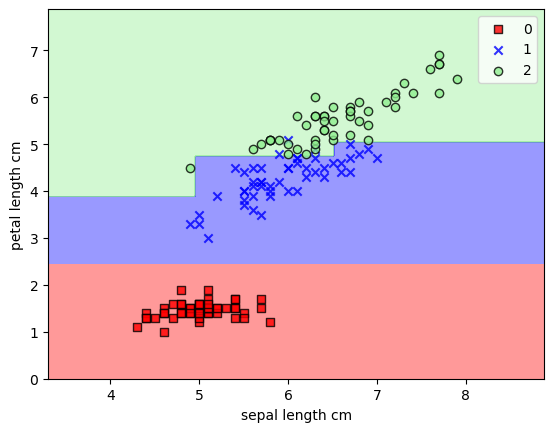

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = "liblinear" , multi_class  = "auto" , C = 100 , random_state=1) 
lr.fit(X,y) 
plot_decision_regions(X[:,[0,2]], y , tree)  # X 위치에도 바꿔줌 

plt.xlabel("sepal length cm")
plt.ylabel("petal length cm")
plt.legend()
plt.show()
#트리 보면 비교할수있음. 

In [22]:
#Random Forest
# Random Forest(랜덤 포레스트)는 앙상블 학습(Ensemble Learning)의 일종으로, 의사 결정 트리(Decision Tree)를 기반
#으로한 분류(Classification)와 회귀(Regression) 알고리즘. 랜덤 포레스트는 여러 개의 의사 결정 트리를 생성하고,
#각각의 트리의 결과를 조합하여 최종 예측을 수행.

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'gini' ,max_depth=4, n_estimators = 25, random_state = 1 , n_jobs= -1) 
#criterion 손실함수정하는것 gini 가 default  불순도 측정 방법으로 Gini 계수를 사용한다는 의미
#max_depth=4는 트리의 최대 깊이를 4로 제한 . n_estimators=25는 앙상블 내의 결정 트리 개수를 25개로 설정 . 
#random_state=1은 재현 가능한 결과를 위해 난수 시드를 설정. n_jobs=-1은 모든 CPU 코어를 사용하여 병렬 처리한다는 의미

forest.fit(X[:,[0,2]] , y)# X의 0번째와 2번째 특성을 사용하여 타겟 변수 y에 대해 훈련

RandomForestClassifier(max_depth=4, n_estimators=25, n_jobs=-1, random_state=1)

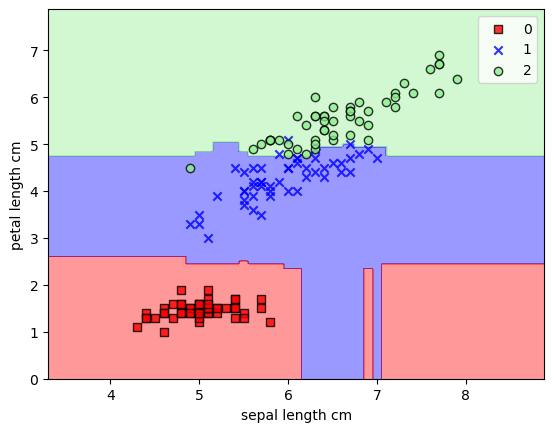

In [23]:
plot_decision_regions(X[:,[0,2]], y , forest)

plt.xlabel("sepal length cm")
plt.ylabel("petal length cm")
plt.legend()
plt.show()

In [ ]:
#SVM(Support Vector Machine) 서포트 백터 머신
#딮러닝이 나오기전 가장 각광받던 학습방법중 하나. 

# 지도 학습(Supervised Learning) 알고리즘 중 하나로, 
# 주로 분류(Classification)와 회귀(Regression) 문제에 사용. SVM은 데이터를 고차원 공간으로 매핑한 후,
#데이터 포인트들을 분리하는 최적의 초평면(hyperplane)을 찾는 방식으로 동작.

#초평면(hyperplane): SVM은 데이터를 분리하기 위해 초평면을 사용. 이 초평면은 데이터가 속한 클래스를 나누는 경계로 사용

# 마진(margin): SVM은 클래스간(두데이터그룹)을 나누는 초평면을 찾으면서 이폭이 가장 넓은 것을 찾는방법. 

# 하드마진 : 어떤것도 안넘게 선긋는것
#하드마진을 사용하면 분류가 안될수있고, 잡음에 민감할수있음. (잡음민감=> 데이터과적합.)

# 소프트마진 : 몇개정도는 넘게 해주고 선긋는것 (일부데이터를 마진내에 들어오도록 하용하면서 분리평면을 찾는경우.)

#서포트 벡터(Support vector) 하드마진이든 소프트 마진이든 최대한 넓게 만들려고 하기때문에 
#양쪽에 서로다른 그룹에 속하는 데이터들이 하나씩 닳아 있으며 이것을. 서포트 벡터. 


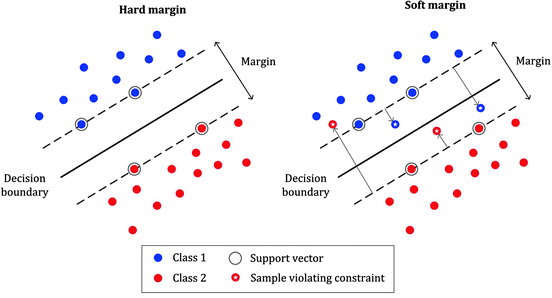

In [58]:
import requests
from io import BytesIO
from IPython.display import Image
image_url = 'https://miro.medium.com/max/1104/1*CD08yESKvYgyM7pJhCnQeQ.png'
response = requests.get(image_url)
img_data = response.content
Image(data=img_data)


In [24]:
from sklearn.preprocessing import StandardScaler # 데이터를 표준화하기 위해 사용되는 클래스
scaler = StandardScaler() 
X_sc = scaler.fit_transform(X[:,[0,2]])#X의 0번째와 2번째 열에 해당하는 특성을 선택하고, 선택된 특성에 대해 표준화를 수행


In [25]:
from sklearn.svm import SVC # Support vector Classifier
svc = SVC(kernel = 'linear' , C = 1 , random_state=1) #C = 서포트백터를 몇개까지 허용할건지
svc.fit(X_sc,y) #표준화된 입력 데이터 X_sc와 타겟 변수 y에 대해 서포트 벡터 머신을 훈련

SVC(C=1, kernel='linear', random_state=1)

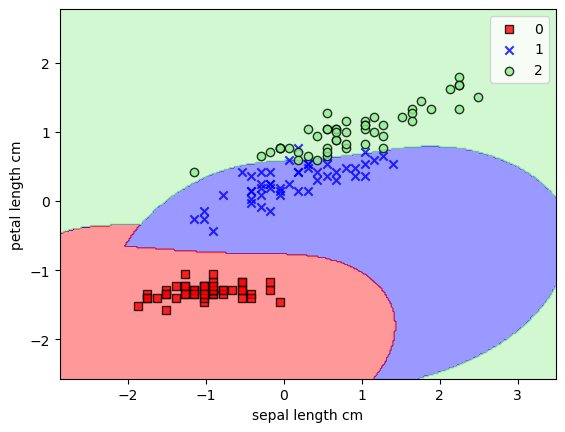

In [27]:
plot_decision_regions(X_sc, y , svc)#호출하여 표준화된 입력 데이터 X_sc와 훈련된 서포트 벡터 머신 svc를 사용하여 결정 영역을 시각화

plt.xlabel("sepal length cm")
plt.ylabel("petal length cm")
plt.legend()
plt.show()

In [26]:
from sklearn.svm import SVC # Support vector Classifier
svc = SVC(kernel = 'rbf' , C = 100 , random_state=1) #C = 서포트백터를 몇개까지 허용할건지 , kernel 의 default = rbf
#kernel='rbf'는 반지름 기반 함수(Radial Basis Function, RBF) 커널을 사용한다는 의미

#이떄 커널이란? 
#커널(kernel)은 머신 러닝에서 주로 사용되는 함수로, 비선형 문제를 다루기 위해 입력 데이터를 고차원 특징 공간으로 매핑하는 역할
#. 이를 통해 비선형 문제를 선형 분류기로 해결할 수 있습니다
svc.fit(X_sc,y)

SVC(C=100, random_state=1)

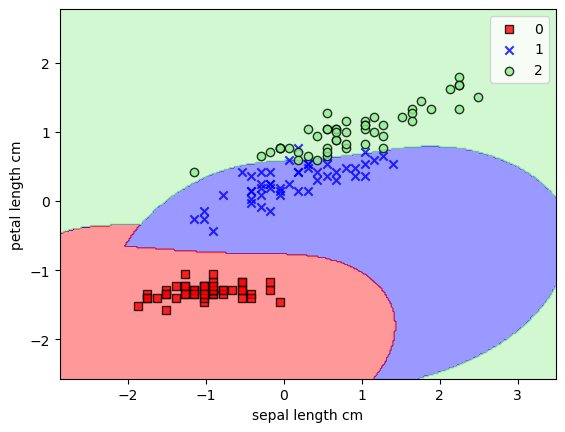

In [28]:
plot_decision_regions(X_sc, y , svc)

plt.xlabel("sepal length cm")
plt.ylabel("petal length cm")
plt.legend()
plt.show()

In [29]:
from sklearn.svm import SVC 
svc = SVC(kernel = 'rbf' , C = 1 , random_state=1 , gamma= 0.1)
svc.fit(X_sc,y)

SVC(C=1, gamma=0.1, random_state=1)

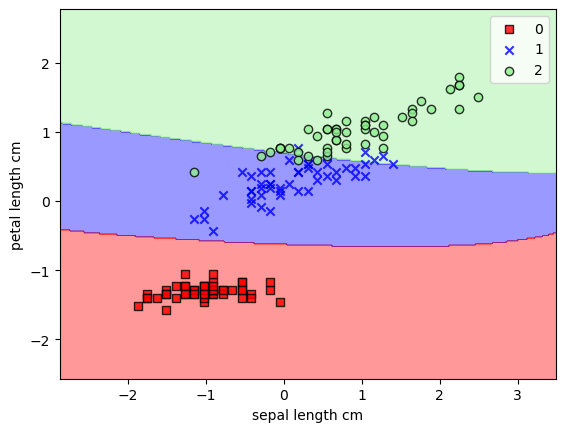

In [97]:
plot_decision_regions(X_sc, y , svc)

plt.xlabel("sepal length cm")
plt.ylabel("petal length cm")
plt.legend()
plt.show()
#여기까지가 딮러닝 나오기 전까지 주류로 쓰임. 

In [30]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target

#기본적은 그전에 원래는 test 는 predict 하기전까지는 한번도 fit 하는과정에 참여하면 안된다?

forest = RandomForestClassifier(n_estimators=500 , random_state=1 ,)
#n_estimators 나무 숫자 500  , random_state 1로 고정 , 
forest.fit(X,y)


RandomForestClassifier(n_estimators=500, random_state=1)

In [32]:
ipt = forest.feature_importances_ #넘파이 array가 나오는데 이게 모델에 저장되있는거임 (특성 중요도.)
                            #wine 데이터에서의 특성 데이터 개수. 
#랜덤 포레스트(Random Forest) 모델인 forest의 특성 중요도(feature importances)를 가져와서 ipt 변수에 저장


np.sort(ipt) # 정렬하면 0.17... 이게 중요한 특성임 근데 이런걸로 무엇인지 모름. 

array([0.00993048, 0.01344608, 0.02252494, 0.022782  , 0.02827689,
       0.03250827, 0.04989197, 0.07799231, 0.12712682, 0.13251384,
       0.14978792, 0.15702209, 0.17619639])

In [33]:
list(zip(ipt, wine.feature_names)) # 그래서 이렇게 짝을 지어줘서 찾음 . 

[(0.13251383629204885, 'alcohol'),
 (0.028276894210034965, 'malic_acid'),
 (0.013446080574032874, 'ash'),
 (0.02252494029889849, 'alcalinity_of_ash'),
 (0.03250827419255629, 'magnesium'),
 (0.049891969860720545, 'total_phenols'),
 (0.15702209208508877, 'flavanoids'),
 (0.009930479576169332, 'nonflavanoid_phenols'),
 (0.022781997198579276, 'proanthocyanins'),
 (0.14978792044587858, 'color_intensity'),
 (0.07799230624561584, 'hue'),
 (0.1271268205309999, 'od280/od315_of_diluted_wines'),
 (0.1761963884893764, 'proline')]

In [34]:
#방법2
for i in np.argsort(ipt):
    print(wine.feature_names[i])
idxs = np.argsort(ipt)[::-1]

nonflavanoid_phenols
ash
alcalinity_of_ash
proanthocyanins
malic_acid
magnesium
total_phenols
hue
od280/od315_of_diluted_wines
alcohol
color_intensity
flavanoids
proline


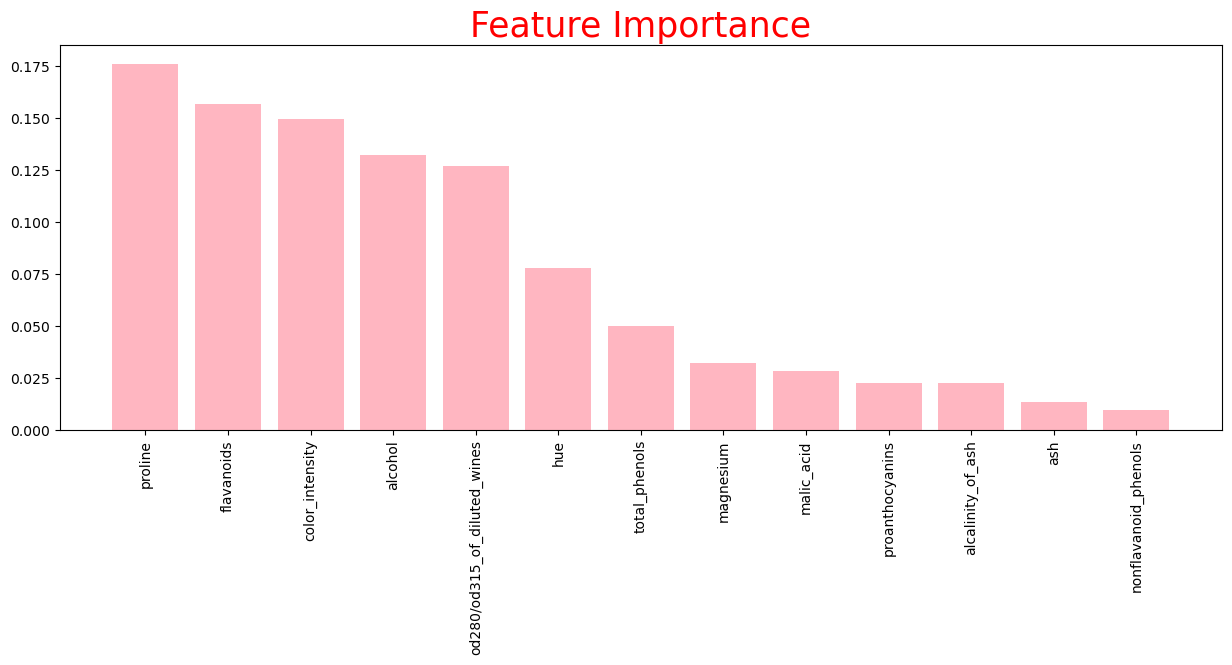

In [35]:
#방법2
plt.figure(figsize=(15,5))
plt.bar(np.array(wine.feature_names)[idxs], ipt[idxs], color="lightpink")
plt.title("Feature Importance", fontsize=25, color='red')
plt.xticks(rotation = 90)
plt.show()

In [36]:
#선형판별분석
X = iris.data
y = iris.target

In [37]:
from sklearn.decomposition import PCA # 주성분 분석(Principal Component Analysis, PCA)을 수행하는 클래스

pca = PCA(n_components= 2) # n_components=2는 주성분의 개수를 2로 설정한다는 의미, 이는 데이터를 2차원으로 차원 축소
X_pca = pca.fit_transform(X)
#원래는 X_train 해줘야하는게 맞음( 분할해서)
#pac.transform(X_test) 이게 정석. 

#주의할 점은 원래 X_train을 사용하여 PCA를 수행하는 것이 정석이지만, 
#위의 코드에서는 단순화된 예시로 전체 데이터 X에 대해 PCA를 수행한 것.
#일반적으로는 훈련 데이터인 X_train을 사용하여 PCA를 학습하고, 이를 기반으로 테스트 데이터인 X_test를 변환하는 것이 권장.


In [38]:
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

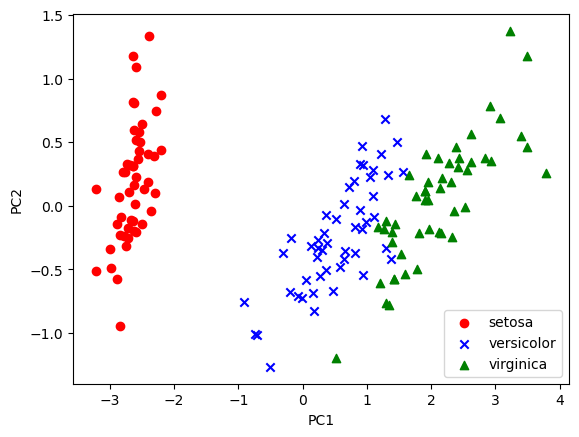

In [39]:
plt.figure()
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color="red", marker="o", label="setosa") 
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color="blue", marker="x", label="versicolor")
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], color="green", marker="^", label="virginica") 
plt.xlabel("PC1") 
plt.ylabel("PC2") 
plt.legend()
plt.show()
#2 개의 차원으로 축소, 

In [ ]:
#machine learning dataflow 머신러닝 수행과정 

# 1. 데이터 수집           <-- 센서
# 2. 데이터 가공  및 통계  <-- 판다스, 넘파이
# 3. 데이터 전처리 1       <-- 판다스, 넘파이 (결측지 / 이상치 처리)
# 3.5 . train_test_split 나눠준이후에 4 로 넘어감.
# 4. 데이터 전처리 2       <-- 넘파이, OpenCV (스케일링 / 값 보정 ) 
# 5. 특성 선택             <-- 판다스, sklearn (상관분석, 차원축소, 특성중요도), train data 로만 
# 6. 모델 선택             <-- sklearn (모델종류 , 하이퍼파라미터) , train data 로만 
# 7. 커널 트릭 및 모델학습 <-- train data 로만   
# 8. 모델 테스트           <-- (4~7 과정에 따라 transform/perdict)

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # 선형 판별 분석(LDA)을 수행하는 클래스
lda = LDA(n_components=2) #n_components=2는 주요 판별 요소의 개수를 2로 설정한다는 의미
x_lda = lda.fit_transform(X, y)   # 입력 데이터 X와 레이블 y에 대해 LDA를 수행 는 데이터를 판별 요소로 변환후 매핑
# 당연하게 lda.fit_transform(X_train , s_test) 만나와야함
#lda.transform(X_test)

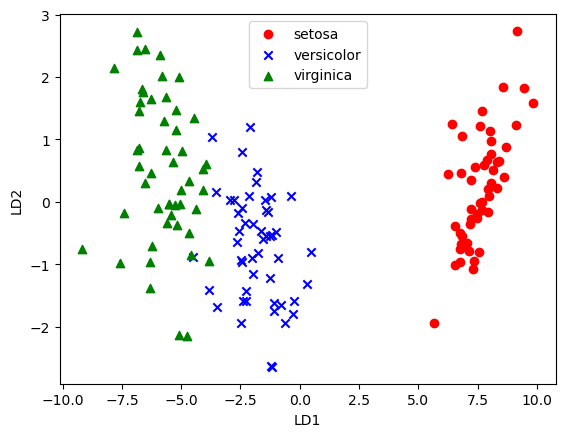

In [43]:
plt.figure()
plt.scatter(x_lda[y == 0, 0], x_lda[y == 0, 1], color="red", marker="o", label="setosa") 
plt.scatter(x_lda[y == 1, 0], x_lda[y == 1, 1], color="blue", marker="x", label="versicolor")
plt.scatter(x_lda[y == 2, 0], x_lda[y == 2, 1], color="green", marker="^", label="virginica") 
plt.xlabel("LD1") 
plt.ylabel("LD2") 
plt.legend()
plt.show()
#LDA 이게 더성능좋음 

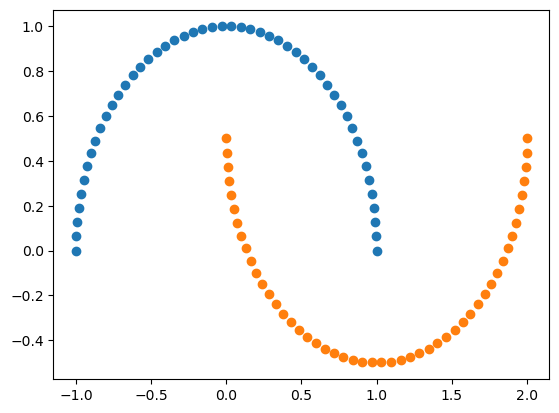

In [161]:
from sklearn.datasets import make_moons , make_circles

X,y = make_moons(n_samples= 100 , random_state= 1 ) #X는 입력 특성을 나타내는 배열이고, y는 해당하는 클래스 레이블을 나타내는 배
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1]) 
plt.show()

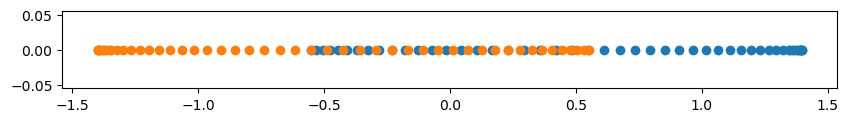

In [167]:
pca = PCA(n_components=1) # 1차원으로 차원 축소된 데이터를 시각화하는 예시
X_pca =  pca.fit_transform(X) #입력 데이터 X를 1차원으로 차원 축소, X_pca에 저장

plt.figure(figsize=(10,1))
plt.scatter(X_pca[y==0,0], np.zeros_like(X_pca[y==0,0])) #np.zeros(X_pca)
plt.scatter(X_pca[y==1,0], np.zeros_like(X_pca[y==1,0])) 
plt.show()

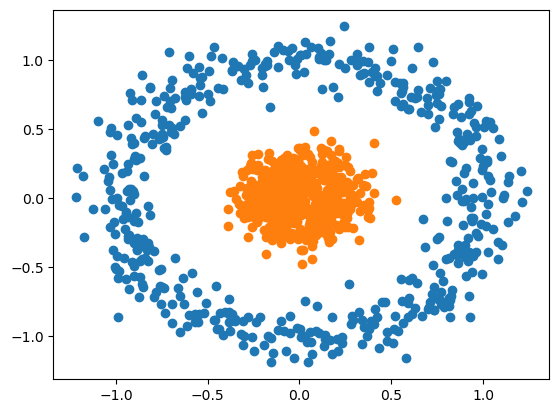

In [44]:
from sklearn.datasets import make_moons , make_circles

X,y = make_circles(n_samples= 1000 , random_state= 1 , noise= 0.1, factor=0.2)
#random_state는 재현 가능성을 위한 난수 시드 , noise는 데이터에 추가될 잡음의 크기를 조절하는 매개변수이며, 
#factor는 내부 원과 외부 원의 크기 비율을 조절하는 매개변수

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1]) 
plt.show()

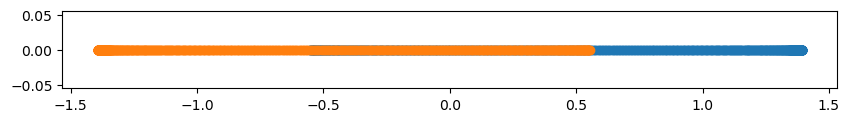

In [197]:
pca = PCA(n_components=1)
X_pca =  pca.fit_transform(X)
    
plt.figure(figsize=(10,1)) 
plt.scatter(X_pca[y==0,0], np.zeros_like(X_pca[y==0,0])) #np.zeros(X_pca) 
plt.scatter(X_pca[y==1,0], np.zeros_like(X_pca[y==1,0])) 
plt.show()

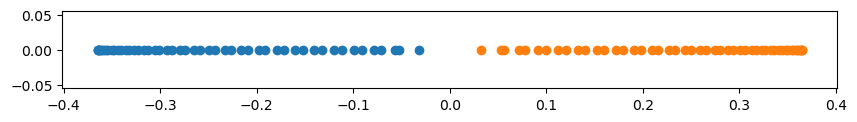

In [192]:
from sklearn.decomposition import KernelPCA  # 데이터를 차원 축소한 후 1차원으로 시각화하는 예시

X,y = make_moons(n_samples= 100 , random_state= 1) #, noise= 0.1, factor=0.2) #반달 모양의 데이터셋을 생성

pca = KernelPCA(n_components= 1, kernel="rbf", gamma=15 )
#n_components는 생성할 주성분의 개수를 나타내며, 여기서는 1차원으로 축소하므로 1을 설정.
#kernel은 사용할 커널 함수를 지정하고, 여기서는 RBF(Radial Basis Function) 커널을 사용.
#gamma는 RBF 커널의 gamma 매개변수를 설정

X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,1))
plt.scatter(X_pca[y==0,0], np.zeros_like(X_pca[y==0,0])) 
plt.scatter(X_pca[y==1,0], np.zeros_like(X_pca[y==1,0])) 
#X_pca[y==1,0]와 np.zeros_like(X_pca[y==1,0])는 클래스 1에 해당하는 데이터 포인트와 영벡터를 선택하여 시각화
plt.show()

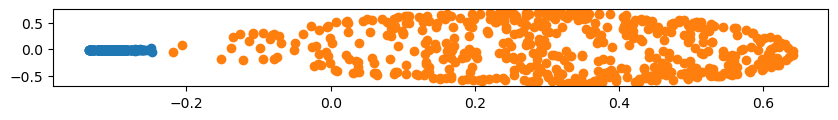

In [202]:
from sklearn.decomposition import KernelPCA  #데이터를 차원 축소한 후 2차원으로 시각화하는 예시

X,y = make_circles(n_samples= 1000 , random_state= 1, noise= 0.1, factor=0.2)
# make_circles 원형모양데이터셋 생성, 샘플갯수 1000개 생성, 재현가능한 난수시드 1로 , 데이터에추가할 잡음 조절, 
#factor는 내부원과 외부원 거리 조절. 
# 감마
# gamma는 RBF(Radial Basis Function) 커널의 매개변수. RBF 커널은 데이터를 비선형 특징 공간으로 매핑하는 데 사용되는 커널 함수.
#gamma 매개변수는 RBF 커널의 영향 범위를 조절하는 역할

# 더 작은 gamma 값은 RBF 커널의 영향 범위를 넓게 만듬. 즉, 데이터 포인트들 간의 거리가 멀어져서 더 많은 포인트들이 
#서로 영향을 받게 됩니다. 이 경우에는 결정 경계가 더 부드러워지고, 모델이 더 다양한 패턴을 학습할 수 있음.
#하지만 gamma 값을 너무 작게 설정하면 과소적합의 위험이 있음.

pca = KernelPCA(n_components= 2, kernel="rbf", gamma=15 )
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,1))
plt.scatter(X_pca[y==0,0], (X_pca[y==0,1])) 
plt.scatter(X_pca[y==1,0], (X_pca[y==1,1])) 
plt.show()